# Оптимизация функции одной переменной

## Постановка задачи

Одна из самых важных задач, связанных с функциями -- это задача **поиска минимума функции** или **задача оптимизации функции**.

Эта задача решается нейронными сетями при обучении. Да, по сути, обучение нейронной сети -- это оптимизация одной большой и очень сложной функции с тысячами или даже миллионами аргументов.

Чуть подробнее: <br>
При обучении нейронной сети мы хотим измерять, насколько хорошо сеть справляется с поставленной задачей. Для этого вводится функция потерь -- такая функция, которая в качестве аргументов принимает правильные ответы и ответы нейронной сети, и выдает некоторое число -- ошибку. Понятно, что мы хотим, чтобы ошибка сети была минимальной. <br>
То есть, ставится задача **минимизации функции потерь**.
Мы хотим подобрать такие аргументы (параметры) нейронной сети, чтобы получить минимум функции потерь.

Сейчас мы научимся минимизировать функции.

## Аналитический алгоритм поиска минимума функции одной переменной

Вспомним, что в ноутбуке по производным мы выяснили, что знак производной функции в точке показывает характер функции в этой точке -- убывает она, возрастает или имеет локальный экстремум. Давайте сформулируем **необходимое и достаточное условие существования экстремума функции $F$ в точке $x$**

1. (необходимое условие) Если функция $F$ имеет экстремум в точке $x$, то либо $F$ не имеет производной в точке $x$, либо $F'(x) = 0$

2. (достаточное условие) Если функция $F$ имеет производную в точке $x$ и $F'(x) = 0$, то в точке $x$ функция $F$ имеет экстремум.

Иными словами, чтобы точка $x$ была точкой экстремума функции $F$, *необходимо*, чтобы $F$ в точке $x$ либо не имела производной, либо эта производная равнялась нулю. И чтобы чтобы точка $x$ была точкой экстремума функции $F$, *достаточно*, чтобы $F'(x)$ существовало и $F'(x) = 0$

Мы далее в курсе будем рассматривать только дифференцируемые на всей области определения функции (т.е. имеющие производную на всей области определения). Для таких функций критерий экстремума в точке выглядит проще:

1. Если $F'(x) = 0$, то в точке $x$ у функции $F$ экстремум.
2. Если у функции $F$ экстремум в точке $x$, то $F'(x) = 0$



Заметим, что мы говорили сейчас об *экстремумах*, а не *точках минимума*. Если в точке $x$ производная $F'(x) = 0$, то это может быть как точкой минимума, так и точкой максимума.

Чтобы убедиться, что точка является точкой минимума, надо взять вторую производную $F''(x)$. Если $F'(x) = 0$ и $F''(x) > 0$, то $x$ -- точка минимума, если же $F'(x) = 0$ и $F''(x) < 0$, то $x$ -- точка максимума.

Итак, **алгоритм нахождения точек локальных минимумов функции F(x)**:
1. найти корни уравнения $F'(x) = 0$ (найти те точки $x$, в которых производная равна 0)
2. Для всех корней уравнения $x$ вычислить вторую производную $F''(x)$. Если она больше нуля, то это точка минимума.

Этот алгоритм **аналитический** -- он основан на решении уравнений.

> Пример #1 <br>
<br>
$$F = 4x^2 - 3x + 5$$
Найдем точки минимума этой функции:<br>
1. Находим производную: $F'(x) = 8x - 3$
2. Решаем уравнение $F'(x) = 8x - 3 = 0$, $x = \frac{3}{8}$ -- получили единственный корень.
3. Находим вторую производную функции $F$ в точке $\frac{3}{8}$: $F''(x) = (8x - 3)' = 8 > 0$, поэтому полученная точка экстремума $x = \frac{3}{8}$ -- точка минимума.<br>
<br>
Итого мы нашли единственную точку минимума $x = \frac{3}{8}$<br>
<br>
Мы можем убедиться в правильности решения, посмотрев на график функции $F$:


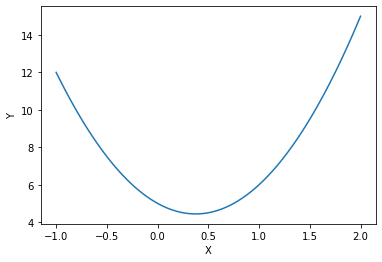

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def F(x):
    return 4*x**2 - 3*x + 5

def plot_function(f):
    x = np.linspace(-1, 2, 100)
    y = list(map(f, x))

    plt.plot(x, y)
    plt.ylabel("Y")
    plt.xlabel("X")

plot_function(F)

> Похоже на правду =)

Этот алгоритм хорошо и позволяет находить точные значения координаты точки минимума функции. Но он не всегда применим.

Рассмотрим функцию, знакомую нам по ноутбуку по производным:<br>
$F(x) = x^4 + 5x^3 - 10x$. Выглядит она так:

In [ ]:
def F(x):
    return x**4 + 5*x**3 - 10*x

x = np.linspace(-5, 2, 100)
y = list(map(F, x))

plt.plot(x, y)
plt.ylabel("Y")
plt.xlabel("X")
plt.scatter([-3.5518, -0.9439, 0.7457], [F(-3.5518), F(-0.9439), F(0.7457)])

Мы помним, что у нее есть две точки минимума и одна точка максимума. Давайте допустим, что мы хотим найти координаты точек минимума, используя наш алгоритм. Нам нужно было бы вычислить производную <br>
$F'(x) = 4x^3 + 15x^2 -10$ <br>
и решить уравнение <br>
$4x^3 + 15x^2 -10 = 0$ <br>
Но это уравнение третьей степени, которое сложно (если не невозможно) решить аналитически. Значит, найти точки минимума нашим алгоритмом не получится.

Очевидно, бывают еще более сложные функции, что уж говорить о функциях многих переменных. Поэтому рассмотрим другой алгоритм поиска минимума функций:

## Алгоритм градиентного спуска: идея

С этого момента и везде далее мы будем считать, что все рассматриваемые функции дифференцируемы на всей области определения.

Посмотрим на график этой коварной функции и на случайную точку $(x, y)$ на нем:

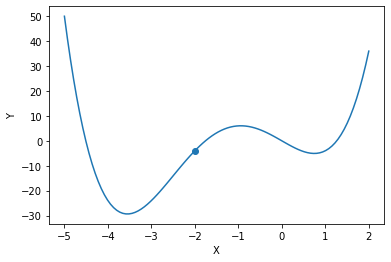

In [ ]:
def F(x):
    return x**4 + 5*x**3 - 10*x

x = np.linspace(-5, 2, 100)
y = list(map(F, x))

plt.plot(x, y)
plt.ylabel("Y")
plt.xlabel("X")
plt.scatter([-2], [F(-2)])
plt.show()

Давайте представим, что мы не видим графика этой функции, но очень хотим найти точку минимума функции.

Из ноутбука по производным мы помним, что знак производной функции в точке показывает, возрастает функция в этой точке или убывает (ну или имеет экстремум). Как нетрудно догадаться, производная в точке $(x, y)$ на нашем графике будет $< 0$, функция в этой точке возрастает. <br>
Это значит, что **какая-то точка локального минимума функции находится правее точки $x$**. <br>
("правее" значит, что минимум функции достигается при значении аргумента $< x$). <br>
Это отличное наблюдение! Это значит, что если мы уменьшим $x$ на некоторую величину $\Delta x$, то мы можем стать ближе к точке минимума!

Тогда алгоритм поиска точки минимума выглядит так:

1. Берем случайную точку $x$ функции $F$
2. Вычисляем производную $F'(x)$
3. Если $F'(x) > 0$, уменьшаем $x$, если $F'(x) < 0$, увеличиваем $x$
4. Повторяем 3

То есть, мы берем случайную точку и начинаем движение от нее к точке минимума, каждый шаг алгоритма вычисляя производную функции в точке, в которой сейчас находимся и сдвигая эту точку в направлении минимума.<br>
Вычислять производную на каждом шаге нужно, потому что мы в какой-то момент можем "перепрыгнуть" через точку минимума, тогда производная поменяет знак и мы поймем, что нужно двигаться обратно.

В идеале это "движение" должно выглядеть так:

<a href="https://ibb.co/gWHbctj"><img src="https://i.ibb.co/vdgCMLw/2020-01-30-19-01-37.jpg" width="400" height="300" alt="2020-01-30-19-01-37" border="0"></a>



Остается два вопроса: на какую величину $\Delta x$ уменьшать и когда останавливать алгоритм.

Давайте попробуем выбрать $\Delta x$. Это нетривиально, ведь мы не видим графика функции и не знаем, насколько далеко точка минимума. А численное значение производной нам показывает только факт убывания функции и скорость убывания (уго наклона графика), но не расстояние до точки минимума.

Другими словами, минимум может быть в точке $x-0.2$, а может быть в точке $x - 200$.

Если мы возьмем слишком большую величину, то можем просто перескочить через точку минимума. Примером такой величины может быть $\Delta x = 2.5$:

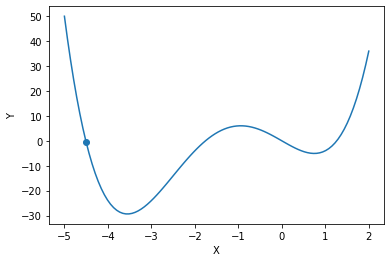

In [ ]:
def F(x):
    return x**4 + 5*x**3 - 10*x

x = np.linspace(-5, 2, 100)
y = list(map(F, x))

plt.plot(x, y)
plt.ylabel("Y")
plt.xlabel("X")
plt.scatter([-4.5], [F(-4.5)])
plt.show()

Итак, нужно брать $\Delta x$ довольно маленьким.

Если мы зафиксируем некоторую величину $\Delta x$ и на каждом шаге алгоритма будем сдвигать $x$ на одинаковую величину $\Delta x$ в направлении минимума, то это может занять очень много времени (например, когда точка минимума в точке $x = 1$, а мы стоим в точке $x = 1001$ и $\Delta x = 1$, нам потребуется 1000 шагов алгоритма, чтобы дойти до минимума). Плюс, если мы стоим в точке $x = 1.5$, то, сдвинувшись на $\Delta x = 1$ по направлению к точке минимума мы попадем в точку $x = 0.5$, далее опять сдвинувшись на $\Delta x = 1$ по направлению к точке минимума мы попадем в точку $x = 1.5$ и будем так ходить туда-сюда, не приближаясь к точке минимума $x = 1$ ближе.

Давайте еще раз внимательно посмотрим на график функции (выше) и увидим, что чем ближе точка к минимуму, тем плавнее график. <br>
Более формально, что чем ближе точка к минимуму, тем меньше скорость убывания/возрастания функции, а значит, тем меньше модуль значения производной.

Мы можем это использовать. Давайте зафиксируем некоторое маленькое число $\epsilon$ и каждый шаг алгоритма будем двигать $x$ по направлению к минимуму на шаг $\epsilon * |F'(x)|$. Тогда пока наша точка будет далеко от минимума, $|F'(x)|$ будет довольно большим и мы будем двигаться большими шагами, а по мере приближения к точке минимума $|F'(x)|$ будет уменьшаться, и наш шаг тоже будет уменьшаться. Так мы менее вероятно перескочим через точку минимума и подойдем к ней ближе в итоге.

Ответ на второй вопрос -- когда останавливать алгоритм поиска минимума -- может быть разный. Действуя таким образом, ровно в точку минимума мы почти никогда не попадем, придется остановиться в какой-то точке возле минимума. Но для применений этого алгоритма нахождение точки около минимума вполне хватает. Чаще всего алгоритм останавливается после прохождения определенного количества шагов и/или достижения определенной близости к точке минимума. Близость, опять же, можно измерять значением производной в точке. Чем ближе, тем модуль производной меньше.

Итак, теперь мы можем сформулировать итоговый алгоритм:

## Алгоритм градиентного спуска



1. Берем случайную точку $x$ функции $F$, фиксируем $\epsilon$ (например, $\epsilon = 0.001$)
2. Вычисляем производную $F'(x)$
3. Изменяем $x$ : $x = x - \epsilon F'(x)$
4. Повторяем 3, пока не пройдет определенное количество шагов и/или мы не станем достаточно близко к точке минимума.

Этот алгоритм называется **алгоритм градиентного спуска**. "Градиентного" -- потому что мы "спускаемся" к точке минимума, вычисляя производную (градиент) функции на каждом шаге.

Выглядит это как-то так:

![alt text](https://rezaborhani.github.io/mlr/mlrefined_images/gifs/unnormalized_gradient_descent.gif)

Заметим, что, начиная движение из одной точки, мы можем найти только одну точку локального минимума. Если хочется найти несколько точек, можно запустить алгоритм градиентного спуска несколько раз из разных случайно выбранных точек. Но гарантии, что мы найдем все точки минимума или что найдем точку глобального минимума, нет.

Существует множество молификаций/оптимизаций алгоритма градиентного спуска, но о них мы говорить не будем. Центральная идея у них одна и та же -- спуск к точке минимума, используя градиент функции.

# Оптимизация функции многих переменной

Давайте перейдем к функциям многих переменных.

Идея нахождения минимума функции многих переменных такая же, как и для функции одной переменной.

Давайте рассмотрим функцию $F(x_1, x_2, \dots, x_n)$ $n$ переменных. <br>
Алгоритм выглядит так:

1. Берем случайную точку $x = (x_1, x_2, \dots, x_n)$ функции $F$, фиксируем $\epsilon$ (например, $\epsilon = 0.001$)
2. Вычисляем частные производные $F'(x)$ по всем $n$ аргументам функции в точке $x = (x_1, x_2, \dots, x_n)$, получаем градиент <br>
$\triangledown F = (F'_{x_1}(x_1, x_2, \dots, x_n), F'_{x_2}(x_1, x_2, \dots, x_n), \dots, F'_{x_n}(x_1, x_2, \dots, x_n))$
3. Изменяем  <br>
$x_1 : x_1 = x_1 - \epsilon F'_{x_1}(x_1, x_2, \dots, x_n)$ <br>
$x_2 : x_2 = x_2 - \epsilon F'_{x_2}(x_1, x_2, \dots, x_n)$ <br>
$\dots$ <br>
$x_n : x_n = x_n - \epsilon F'_{x_n}(x_1, x_2, \dots, x_n)$ <br>
или, в векторной записи, <br>
$x = x - \epsilon \triangledown F(x)$
4. Повторяем 3, пока не пройдет определенное количество шагов и/или мы не станем достаточно близко к точке минимума по каждой из координат

То есть мы вычисляем частные производные по каждому аргументу функции, понимаем для каждого аргумента функции, возрастает или убывает функция по этому аргументу и меняем значения всех $n$ аргументов в ту сторону, где функция убывает.